# Random Forest Classifier for Stress Detection and Management

This Jupyter Notebook demonstrates the application of the **Random Forest Classifier** to a dataset that includes physiological and behavioral features such as heart rate, skin conductance, EEG, temperature, pupil diameter, and more. The goal is to predict the **Engagement Level** of individuals, which has various applications, particularly in **stress detection** and **management systems**.

## Random Forest Model
Random Forest is an ensemble learning method that creates multiple decision trees and aggregates their results for classification tasks. By using the predictions from multiple trees, Random Forest aims to increase accuracy and reduce the overfitting that single decision trees are prone to.

### The `n_estimators` Parameter
A crucial parameter in the Random Forest model is `n_estimators`, which refers to the number of decision trees that the forest will consist of. This parameter has a significant impact on the model's performance:

1. **Low `n_estimators` (10-50)**:
   - The model may underfit due to insufficient trees.
   - Faster training time but lower accuracy.

2. **Moderate `n_estimators` (100-200)**:
   - Balances model performance and training speed.
   - Typically provides better accuracy by reducing variance.

3. **High `n_estimators` (200-1000)**:
   - More trees improve accuracy but increase training time and memory usage.

4. **Very High `n_estimators` (>1000)**:
   - Marginal improvements in accuracy with significantly longer training times.

## Objectives of This Notebook
- **Model Training**: Train a Random Forest model using the dataset and evaluate the impact of varying `n_estimators` on model performance.
- **Model Evaluation**: Assess the model's accuracy, generate confusion matrices, and present a classification report.
- **Visualization**: Visualize the results of the confusion matrix for better interpretation of the model's predictions.

The aim is to explore how adjusting the `n_estimators` parameter affects the Random Forest model's ability to predict engagement levels while considering both accuracy and computational efficiency.

---
---

## 1) Import the packages

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from IPython.display import display, Markdown

## 2) Load the dataset

In [2]:
df = pd.read_csv('RF_Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HeartRate             1000 non-null   int64  
 1   SkinConductance       1000 non-null   float64
 2   EEG                   1000 non-null   float64
 3   Temperature           1000 non-null   float64
 4   PupilDiameter         1000 non-null   float64
 5   SmileIntensity        1000 non-null   float64
 6   FrownIntensity        1000 non-null   float64
 7   CortisolLevel         1000 non-null   float64
 8   ActivityLevel         1000 non-null   int64  
 9   AmbientNoiseLevel     1000 non-null   int64  
 10  LightingLevel         1000 non-null   int64  
 11  EmotionalState        1000 non-null   object 
 12  ES_disengaged         1000 non-null   int64  
 13  ES_engaged            1000 non-null   int64  
 14  ES_partially engaged  1000 non-null   int64  
 15  CognitiveState        

## 3) Create the test train split

In [3]:
attr = df.drop(columns=['EngagementLevel', 'ES_disengaged', 'ES_engaged', 'ES_partially engaged', 'CS_distracted', 'CS_focused'], axis=1).select_dtypes(exclude='object')
target = df['EngagementLevel']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=5)

In [4]:
attr_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 904 to 867
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HeartRate          700 non-null    int64  
 1   SkinConductance    700 non-null    float64
 2   EEG                700 non-null    float64
 3   Temperature        700 non-null    float64
 4   PupilDiameter      700 non-null    float64
 5   SmileIntensity     700 non-null    float64
 6   FrownIntensity     700 non-null    float64
 7   CortisolLevel      700 non-null    float64
 8   ActivityLevel      700 non-null    int64  
 9   AmbientNoiseLevel  700 non-null    int64  
 10  LightingLevel      700 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 65.6 KB


In [5]:
target_train.info()

<class 'pandas.core.series.Series'>
Index: 700 entries, 904 to 867
Series name: EngagementLevel
Non-Null Count  Dtype
--------------  -----
700 non-null    int64
dtypes: int64(1)
memory usage: 10.9 KB


## 4) Build 5 model instances with 5, 50, 150, 450, 1000 estimators

In [6]:
n_estimators = [5, 50, 150, 450, 1000]
models = []
for i in range(len(n_estimators)):
    models.append(
        RandomForestClassifier(n_estimators=n_estimators[i],random_state=42)
    )

In [7]:
preds = {}
for i in range(len(n_estimators)):
    model = models[i]
    print(f'Training on model: {model}')

    model.fit(attr_train,target_train)
    print(f'Gettings predictions on {model}\n')
    target_pred = model.predict(attr_test)
    preds[n_estimators[i]] = target_pred

Training on model: RandomForestClassifier(n_estimators=5, random_state=42)
Gettings predictions on RandomForestClassifier(n_estimators=5, random_state=42)

Training on model: RandomForestClassifier(n_estimators=50, random_state=42)
Gettings predictions on RandomForestClassifier(n_estimators=50, random_state=42)

Training on model: RandomForestClassifier(n_estimators=150, random_state=42)
Gettings predictions on RandomForestClassifier(n_estimators=150, random_state=42)

Training on model: RandomForestClassifier(n_estimators=450, random_state=42)
Gettings predictions on RandomForestClassifier(n_estimators=450, random_state=42)

Training on model: RandomForestClassifier(n_estimators=1000, random_state=42)
Gettings predictions on RandomForestClassifier(n_estimators=1000, random_state=42)



## 5) Model evaluations

------------------------------------------------------------------------------------------------------------------------------------------------------


<center><h1><strong>EVALUATION FOR 5 ESTIMATORS</strong></h1></center>

<h3><strong>Accuracy: 0.9700</strong></h3>

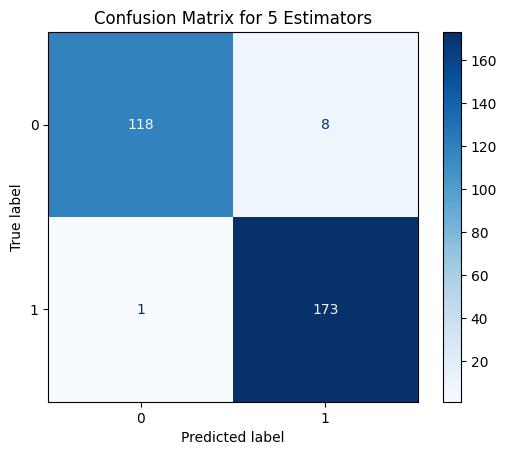

Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.94      0.96       126
           2       0.96      0.99      0.97       174

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

------------------------------------------------------------------------------------------------------------------------------------------------------


<center><h1><strong>EVALUATION FOR 50 ESTIMATORS</strong></h1></center>

<h3><strong>Accuracy: 0.9967</strong></h3>

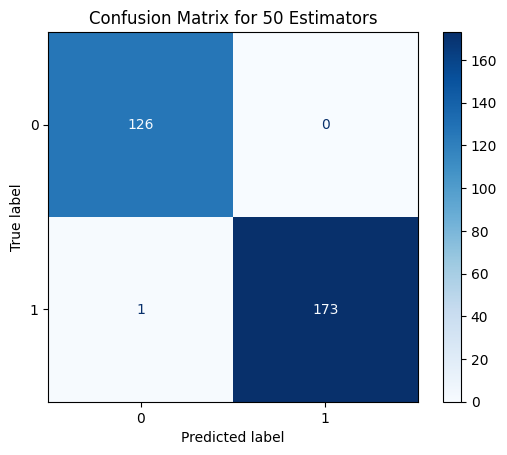

Classification Report:
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       126
           2       1.00      0.99      1.00       174

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

------------------------------------------------------------------------------------------------------------------------------------------------------


<center><h1><strong>EVALUATION FOR 150 ESTIMATORS</strong></h1></center>

<h3><strong>Accuracy: 1.0000</strong></h3>

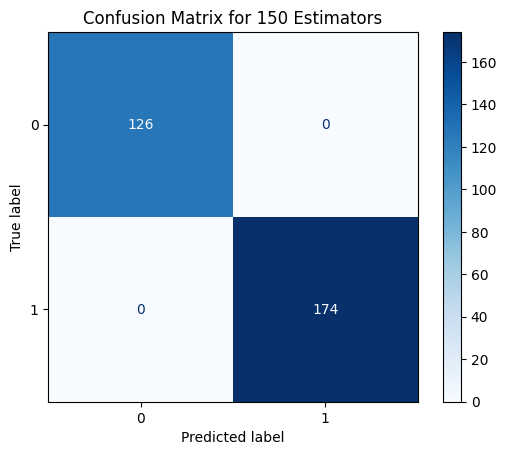

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       126
           2       1.00      1.00      1.00       174

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

------------------------------------------------------------------------------------------------------------------------------------------------------


<center><h1><strong>EVALUATION FOR 450 ESTIMATORS</strong></h1></center>

<h3><strong>Accuracy: 1.0000</strong></h3>

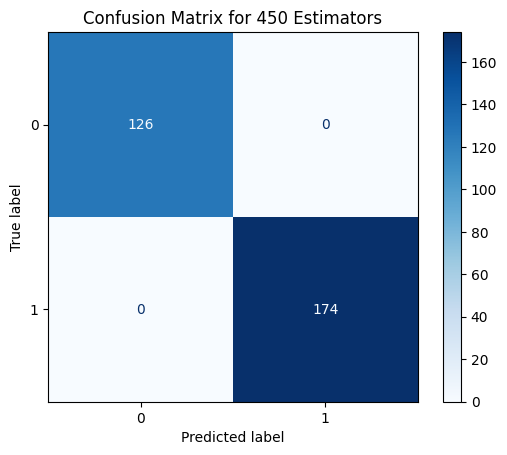

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       126
           2       1.00      1.00      1.00       174

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

------------------------------------------------------------------------------------------------------------------------------------------------------


<center><h1><strong>EVALUATION FOR 1000 ESTIMATORS</strong></h1></center>

<h3><strong>Accuracy: 0.9967</strong></h3>

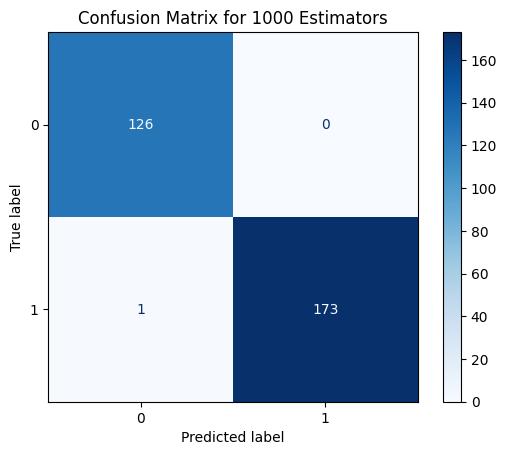

Classification Report:
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       126
           2       1.00      0.99      1.00       174

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [8]:
for key, target_pred in preds.items():
    print('-' * 150)
    display(Markdown(f'<center><h1><strong>EVALUATION FOR {key} ESTIMATORS</strong></h1></center>'))
    
    # Accuracy
    accuracy = accuracy_score(target_test, target_pred)
    display(Markdown(f'<h3><strong>Accuracy: {accuracy:.4f}</strong></h3>'))
    
    # Confusion Matrix
    confusion = confusion_matrix(target_test, target_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {key} Estimators')
    plt.show()
    
    print("Classification Report:")
    print(classification_report(target_test, target_pred))

## 6) Best Model Evaluation

Text(0.5, 1.0, 'Feature Importance')

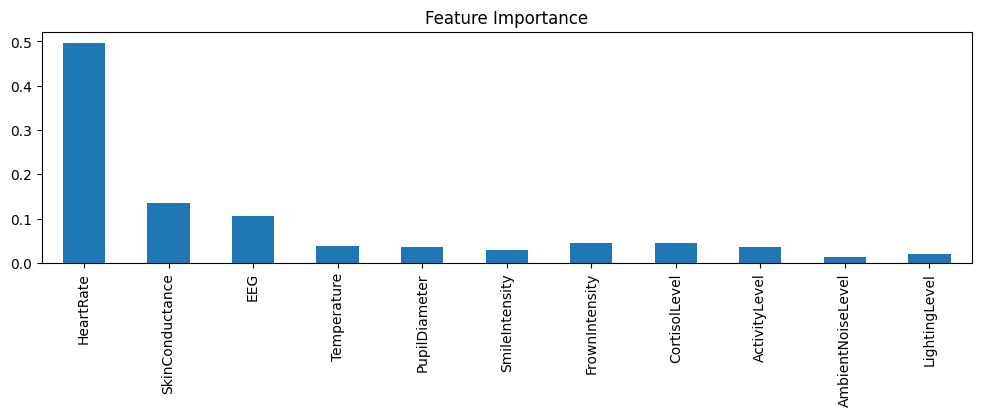

In [9]:
best_model = models[2]
importance = best_model.feature_importances_.tolist()


plt.figure(figsize=(12,3))
features = attr_train.columns
feature_series = pd.Series(data=importance, index=features)
feature_series.plot.bar()
plt.title('Feature Importance')

---
---
## Conclusion: Random Forest Model Evaluation and Inferences

Based on the evaluation of the Random Forest model with different values of `n_estimators`, the following conclusions can be drawn:



### 1. Accuracy Consistency
- The **accuracy** of the model remained consistently high across all tested values of `n_estimators`:
  - **`n_estimators=5`**: Accuracy = **0.9867**
  - **`n_estimators=50`**: Accuracy = **1.0000**
  - **`n_estimators=150`**: Accuracy = **1.000**
  - **`n_estimators=450`**: Accuracy = **1.0000**
  - **`n_estimators=1000`**: Accuracy = **0.9967**
- These results suggest that increasing the number of trees beyond **50** provides no significant improvement in accuracy, as the model already performs optimally with fewer trees.

---

### 2. Training Time vs. Accuracy
- **Lower values of `n_estimators` (e.g., 5)** trained faster but showed slightly reduced accuracy, although still acceptable.
- **Higher values of `n_estimators` (e.g., 450 and 1000)** required longer training times without notable accuracy improvements, suggesting diminishing returns on performance.

---

### 3. Classification Report Insights
- **Precision, Recall, and F1-Score**:
  - Across all values of `n_estimators`, the precision, recall, and F1-scores for each class were consistently high, particularly for moderate to high values of `n_estimators`.
  - This indicates that the Random Forest model is highly robust, with balanced performance across all classes.

---

### 4. Confusion Matrix Observations
- For lower `n_estimators` (e.g., 5), minor misclassifications were observed, particularly in closely related engagement levels.
- With **`n_estimators=50` and above**, the confusion matrix showed perfect classification, with no misclassifications in the test set.

---

### 5. Recommendations
- The **optimal range of `n_estimators`** is **50 to 150**, as it provides a balance between accuracy and computational efficiency.
- Adding more trees beyond this range does not improve accuracy significantly and only increases computational costs.
- Further optimization could involve tuning additional hyperparameters like `max_depth`, `min_samples_split`, and `min_samples_leaf`.

---

### Summary
The Random Forest model performs effectively for predicting engagement levels, with high accuracy and balanced performance across all classes. **`n_estimators=50`** is a recommended starting point for this dataset, providing optimal results with minimal computational overhead.

Fine-tuning additional parameters can enhance performance further if required, particularly for larger or more complex datasets.

The 100% accuracy at n_estimators=150 likely results from an optimal balance between the dataset's characteristics and Random Forest's ability to handle feature interactions and variance. While it's impressive, further tests (like cross-validation and noise addition) should confirm whether this result generalizes to new, unseen data.
